In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import cv2

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")
!ls


image.jpg  sample_data


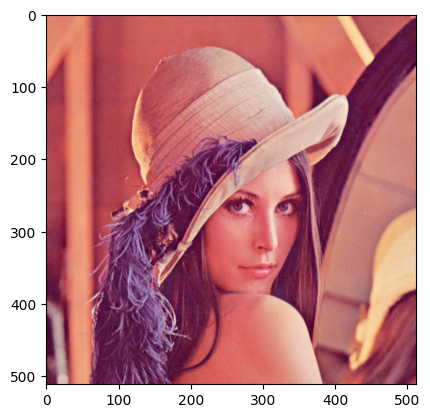

In [ ]:
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Задание 1 Чтение и отображение

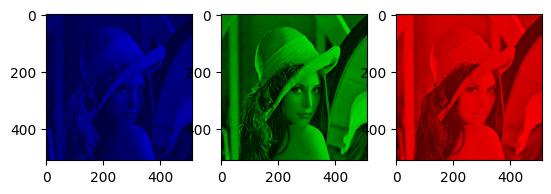

In [ ]:
import matplotlib.pyplot as plt
img = np.array(Image.open(("image.jpg")))# numpy массив в формате RGB


blue_img = np.array(Image.open(("image.jpg")))
green_img = np.array(Image.open(("image.jpg")))
red_img = np.array(Image.open(("image.jpg")))

for i in range(len(img)):
  for j in range(len(img)):
    blue_img[i][j][0] = 0
    blue_img[i][j][1] = 0

    green_img[i][j][0] = 0
    green_img[i][j][2] = 0

    red_img[i][j][1] = 0
    red_img[i][j][2] = 0


figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,3)
ax1.imshow(blue_img)
ax2.imshow(green_img)
ax3.imshow(red_img)
plt.show()


In [ ]:
plt.hist(img[:, :, 2].ravel(), bins=range(256),histtype = 'step', ec = 'b')
plt.hist(img[:, :, 1].ravel(), bins=range(256),histtype = 'step', ec = 'g')
plt.hist(img[:, :, 0].ravel(), bins=range(256),histtype = 'step', ec = 'r')
plt.show()

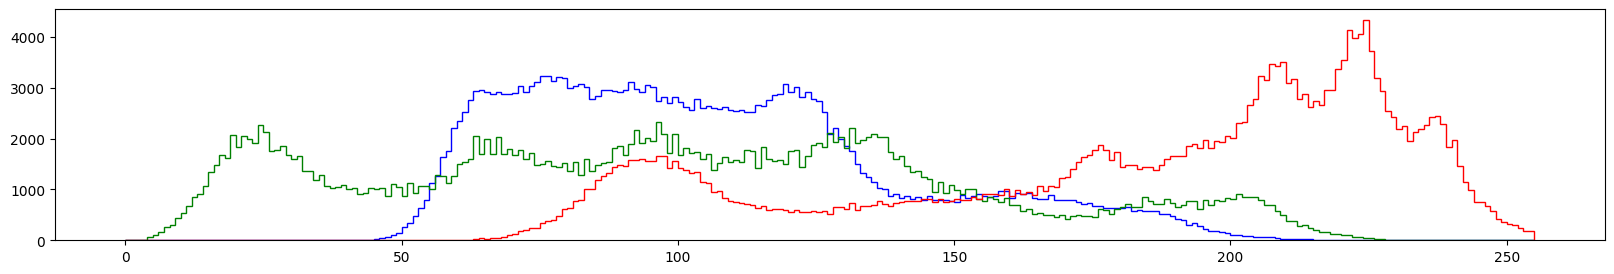

In [ ]:
plt.hist(img[:, :, 2].ravel(), bins=range(256),histtype = 'step', ec = 'b')
plt.hist(img[:, :, 1].ravel(), bins=range(256),histtype = 'step', ec = 'g')
plt.hist(img[:, :, 0].ravel(), bins=range(256),histtype = 'step', ec = 'r')
plt.show()

# Задание 2 Добавление границы

In [ ]:
img[0]

array([[226, 137, 125],
       [226, 137, 125],
       [223, 137, 133],
       ...,
       [230, 148, 122],
       [221, 130, 110],
       [200,  99,  90]], dtype=uint8)

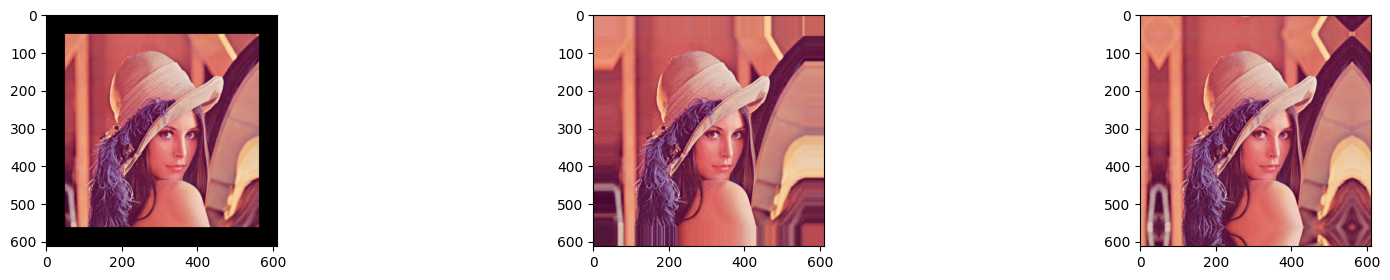

In [ ]:
#Ваш код здесь
def add_border(image, border_size, method):

  if method=='color':
    y = len(image)
    x = len(image[0])
    img = [[[0,0,0]]*(x+2*border_size) for i in range(y+2*border_size)]
    for i in range(y):
      for j in range(x):
        img[i+border_size][j+border_size]=image[i][j]

  if method == 'clamp':
    img = image

    for i in range(border_size):
      img = np.append(img[0:1], img[:], axis=0)
    img = np.rot90(img)

    for i in range(border_size):
      img = np.append(img[0:1], img[:], axis=0)
    img = np.rot90(img)

    for i in range(border_size):
      img = np.append(img[0:1], img[:], axis=0)
    img = np.rot90(img)

    for i in range(border_size):
      img = np.append(img[0:1], img[:], axis=0)
    img = np.rot90(img)

  if method == 'mirror':
    img = image
    img = np.append(np.flipud(img[0:border_size]), img[:], axis=0)
    img = np.rot90(img)
    img = np.append(np.flipud(img[0:border_size]), img[:], axis=0)
    img = np.rot90(img)
    img = np.append(np.flipud(img[0:border_size]), img[:], axis=0)
    img = np.rot90(img)
    img = np.append(np.flipud(img[0:border_size]), img[:], axis=0)
    img = np.rot90(img)

  return img

border_img1 = add_border(img, 50, 'color')

border_img2 = add_border(img, 50, 'clamp')

border_img3 = add_border(img, 50, 'mirror')

figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,9)
ax1.imshow(border_img1)
ax2.imshow(border_img2)
ax3.imshow(border_img3)
plt.show()

# Задание 3 RGB  -> GRAY

In [ ]:
img[0][0]

array([226, 137, 125], dtype=uint8)

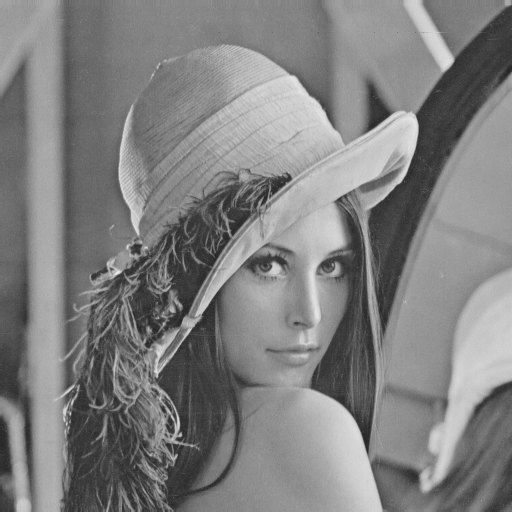

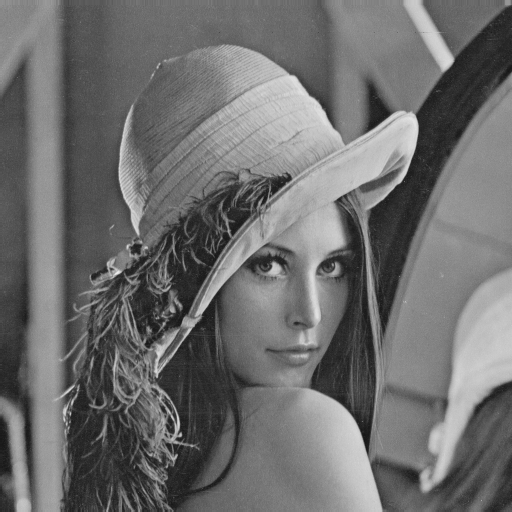

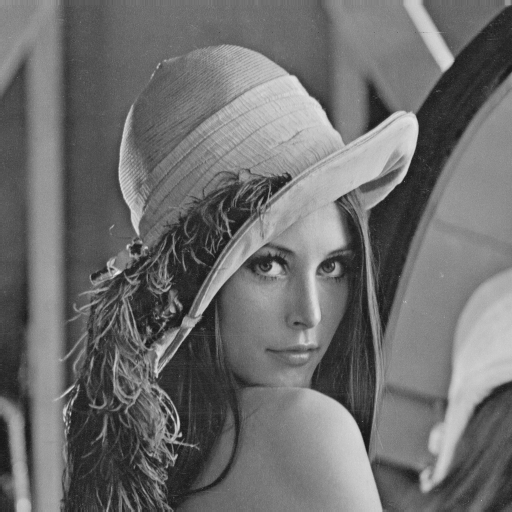

In [ ]:
#Ваш код здесь
from google.colab.patches import cv2_imshow
def to_gray(image, method):

  if method == 1:

    for i in range(len(image)):
      for j in range(len(image[0])):
        a = image[i][j][0]/3+image[i][j][1]/3+image[i][j][2]/3
        image[i][j]=[a, a, a]

  if method == 2:

    for i in range(len(image)):
      for j in range(len(image[0])):
        a = image[i][j][0]*0.299+image[i][j][1]*0.587+image[i][j][2]*0.114
        image[i][j]=[a, a, a]
  if method == 3:

    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return image


a1 = to_gray( cv2.imread("image.jpg"), 1)
a2 = to_gray( cv2.imread("image.jpg"), 2)
a3 = to_gray( cv2.imread("image.jpg"), 3)

cv2_imshow(a1)
cv2_imshow(a2)
cv2_imshow(a3)


# Задание 4 Манипуляция с пикселями

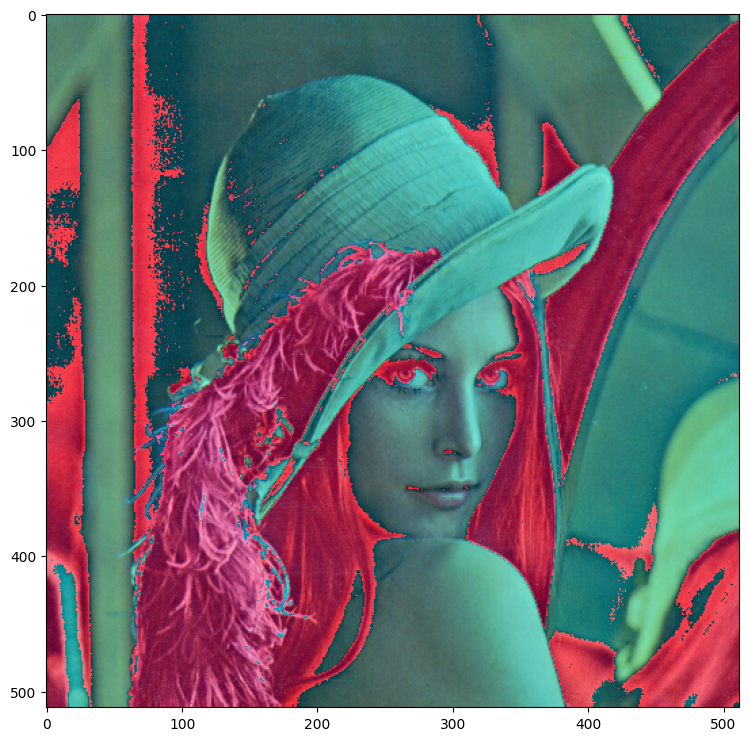

In [ ]:
def clamp(n, min = 0, max=255):
    if n < min:
        return min
    elif n > max:
        return max
    else:
        return n

def shift_image(image, channel, val):
  for i in range(len(image)):
    for j in range(len(image[0])):
      image[i][j][channel]=image[i][j][channel]*val
  return image
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2_imshow(shift_image(img, 0, 1.5))
plt.imshow(shift_image(img, 0, 1.5))
plt.show()

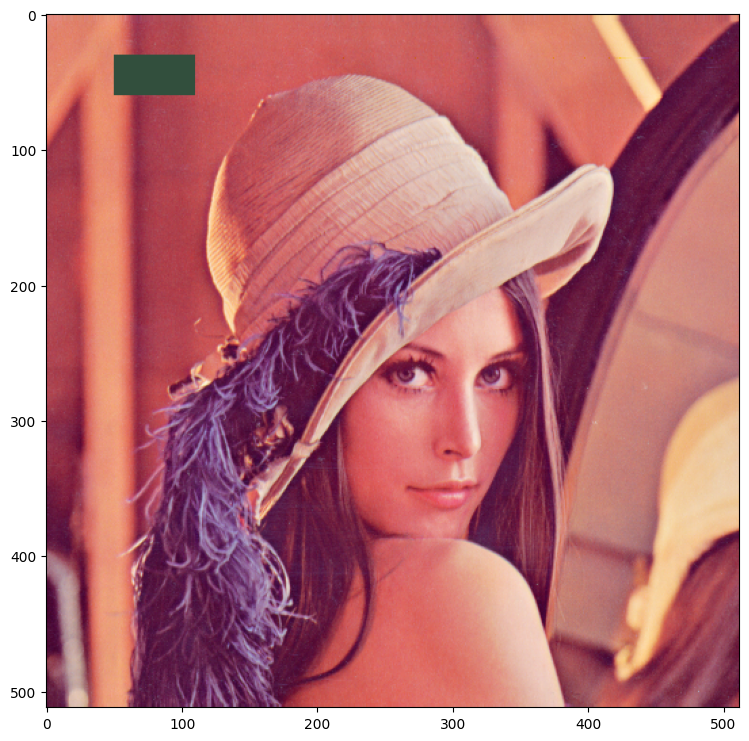

In [ ]:
def get_rect(image, rect_coord, color):
  for i in range(rect_coord[0][0], rect_coord[1][0]):
    for j in range(rect_coord[0][1], rect_coord[1][1]):
      image[i][j] = color
  return image
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2_imshow(get_rect(img, [[30, 50],[60, 110]], [50,79,61]))
plt.imshow(get_rect(img, [[30, 50],[60, 110]], [50,79,61]))
plt.show()

# Задание 5 RGB -> HSV

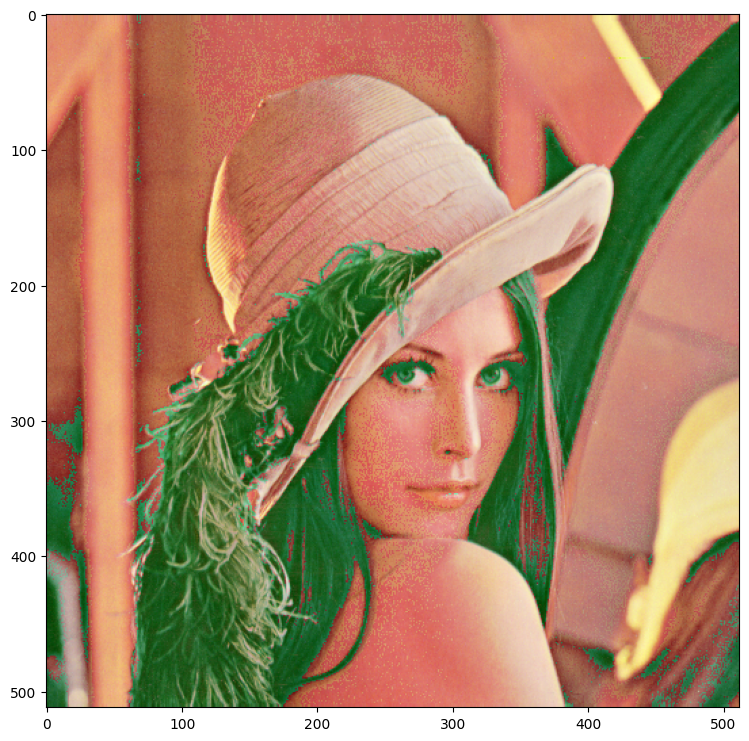

In [ ]:
def rgbtohsv(image):
  hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
  return hsv_img
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(shift_image(rgbtohsv(img), 0, 1.5), cv2.COLOR_HSV2RGB))
plt.show()
